# **Importar Librerias**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **Importación de Archivo**

In [2]:

df = pd.read_csv ('/Users/pedrocanto/Desktop/SANTI/all_weekly_excess_deaths.csv', decimal= '.')

df.start_date = pd.to_datetime(df.start_date)
df.end_date = pd.to_datetime(df.end_date)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7808 entries, 0 to 7807
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   country                   7808 non-null   object        
 1   region                    7808 non-null   object        
 2   region_code               7808 non-null   object        
 3   start_date                7808 non-null   datetime64[ns]
 4   end_date                  7808 non-null   datetime64[ns]
 5   days                      7808 non-null   int64         
 6   year                      7808 non-null   int64         
 7   week                      7808 non-null   int64         
 8   population                7808 non-null   int64         
 9   total_deaths              7808 non-null   float64       
 10  covid_deaths              7808 non-null   float64       
 11  expected_deaths           7808 non-null   float64       
 12  excess_deaths       

In [3]:
df.tail(20)

,country,region,region_code,start_date,end_date,days,year,week,population,total_deaths,covid_deaths,expected_deaths,excess_deaths,non_covid_deaths,covid_deaths_per_100k,excess_deaths_per_100k,excess_deaths_pct_change
7788,United States,United States,USA,2021-03-21,2021-03-27,7,2021,12,317812460,58983.0,6938.0,55223.0,3760.0,52045.0,2.183048,1.183088,0.068088
7789,United States,United States,USA,2021-03-28,2021-04-03,7,2021,13,317812460,56907.0,9573.0,54852.0,2055.0,47334.0,3.012154,0.646608,0.037464
7790,United States,United States,USA,2021-04-04,2021-04-10,7,2021,14,317812460,59086.0,6723.0,54277.0,4809.0,52363.0,2.115398,1.513157,0.088601
7791,United States,United States,USA,2021-04-11,2021-04-17,7,2021,15,317812460,57331.0,5026.0,53841.0,3490.0,52305.0,1.581436,1.098132,0.064820
7792,United States,United States,USA,2021-04-18,2021-04-24,7,2021,16,317812460,58446.0,4670.0,53315.0,5131.0,53776.0,1.469420,1.614474,0.096239
7793,United States,United States,USA,2021-04-25,2021-05-01,7,2021,17,317812460,57953.0,4644.0,52781.0,5172.0,53309.0,1.461239,1.627375,0.097990
7794,United States,United States,USA,2021-05-02,2021-05-08,7,2021,18,317080915,57045.0,4438.0,52252.0,4793.0,52607.0,1.399643,1.511602,0.091729
7795,United States,United States,USA,2021-05-09,2021-05-15,7,2021,19,317080915,56576.0,4064.0,51885.0,4691.0,52512.0,1.281692,1.479433,0.090411
7796,United States,United States,USA,2021-05-16,2021-05-22,7,2021,20,317080915,56849.0,3919.0,51584.0,5265.0,52930.0,1.235962,1.660459,0.102067
7797,United States,United States,USA,2021-05-23,2021-05-29,7,2021,21,317080915,55335.0,4107.0,51230.0,4105.0,51228.0,1.295253,1.294622,0.080129


# **Limpieza de Datos**

In [4]:
buscar = ['Mexico', 'Canada', 'United States', 'Peru', 'Ecuador']
df_am = df[df.country.str.contains('|'.join(buscar))]
df_am.country.unique()

array(['Canada', 'Ecuador', 'Mexico', 'Peru', 'United States'],
      dtype=object)

In [5]:
df_1 = df_am[(df_am['covid_deaths'] >= 0) & (df_am['covid_deaths'] <= 210)]
df_1 = df_1[df_1['start_date'] >= '2021-05-16']

df_1 = df_1.reset_index(drop= True)

df_1.info(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   country                   545 non-null    object        
 1   region                    545 non-null    object        
 2   region_code               545 non-null    object        
 3   start_date                545 non-null    datetime64[ns]
 4   end_date                  545 non-null    datetime64[ns]
 5   days                      545 non-null    int64         
 6   year                      545 non-null    int64         
 7   week                      545 non-null    int64         
 8   population                545 non-null    int64         
 9   total_deaths              545 non-null    float64       
 10  covid_deaths              545 non-null    float64       
 11  expected_deaths           545 non-null    float64       
 12  excess_deaths         

# **GRAFICAS**

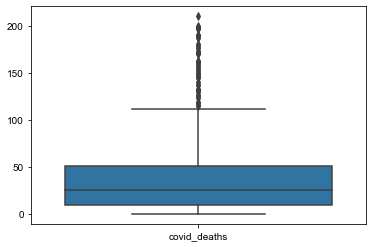

<Figure size 720x360 with 0 Axes>

In [6]:
sns.boxplot(data = df_1.loc[:,['covid_deaths']])
plt.figure(figsize = (10,5))
sns.set(font_scale=1.5)

plt.show()

In [7]:
df_1.covid_deaths.describe()

count    545.000000
mean      39.038532
std       42.928296
min        0.000000
25%        9.000000
50%       25.000000
75%       51.000000
max      210.000000
Name: covid_deaths, dtype: float64

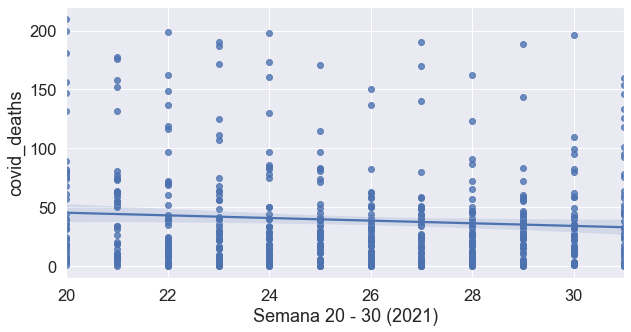

In [8]:
plt.figure(figsize = (10,5))
sns.set(font_scale=1.5)
sns.regplot(
    x= 'week',
    y= 'covid_deaths',
    data = df_1,
    fit_reg = True
)
plt.xlabel('Semana 20 - 30 (2021)')

plt.show()

Text(0, 0.5, 'Frecuencia')

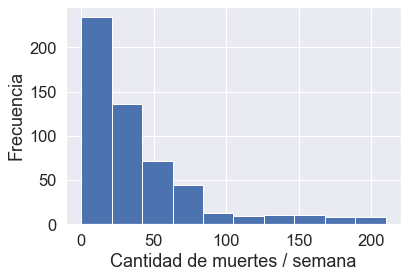

In [9]:
plt.hist(df_1.loc[(df_1['covid_deaths'] >= 0),'covid_deaths'])
plt.xlabel('Cantidad de muertes / semana')
plt.ylabel('Frecuencia')